56마리 농어의 3가지 특성을 가진 데이터를 불러옴

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [84]:
df = pd.read_csv("https://bit.ly/perch_csv_data")
fish = pd.read_csv("./Fish.csv")
perch_weight = fish["Weight"][fish["Species"] == "Perch"].to_numpy()
perch_full = df.to_numpy()
print(perch_full.shape)
print(perch_full[:5])

(56, 3)
[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]]


데이터 준비

In [85]:
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state = 42)
print(train_input.shape)
print(test_input.shape)
print(train_target.shape)
print(test_target.shape)

(42, 3)
(14, 3)
(42,)
(14,)


## 변환기 실습

변환기는 수집한 특성을 만들거나 전처리하기 위한 클래스임   
변환기 클래스는 fit(), transform() 메서드를 포함한다.


In [86]:
poly = PolynomialFeatures(include_bias = False)
print(train_input[0])
poly.fit([train_input[0]])
print(poly.transform([train_input[0]]))
print("(X[0]) (X[1]) (X[2]) (X[0] ** 2) (X[0] * X[1]) (X[0] * X[2]) (X[1] ** 2) (X[1] * X[2]) (X[2] ** 2)")

[19.6   5.14  3.04]
[[ 19.6      5.14     3.04   384.16   100.744   59.584   26.4196  15.6256
    9.2416]]
(X[0]) (X[1]) (X[2]) (X[0] ** 2) (X[0] * X[1]) (X[0] * X[2]) (X[1] ** 2) (X[1] * X[2]) (X[2] ** 2)


## 농어 테스트 셋 적용

In [87]:
poly2 = PolynomialFeatures(include_bias = 0 == 1)
poly2.fit(train_input)
train_poly = poly2.transform(train_input)
test_poly = poly2.transform(test_input)

print(train_poly.shape)
print(train_poly[:3])
print(poly2.get_feature_names_out())

(42, 9)
[[ 19.6      5.14     3.04   384.16   100.744   59.584   26.4196  15.6256
    9.2416]
 [ 22.       5.88     3.52   484.     129.36    77.44    34.5744  20.6976
   12.3904]
 [ 18.7      5.2      3.12   349.69    97.24    58.344   27.04    16.224
    9.7344]]
['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


훈련

In [88]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
# 변환기 클래스를 통해 특성을 추가하여 과소적합 문제 해결

0.9903183436982125
0.9714559911594111


특성이 무조건 많다고 좋은가?

In [89]:
poly2 = PolynomialFeatures(degree = 5, include_bias = 0 == 1) # 5제곱 항까지 추가
poly2.fit(train_input)
train_poly = poly2.transform(train_input)
test_poly = poly2.transform(test_input)

print(train_poly.shape)
print(poly2.get_feature_names_out())
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
# 훈련 데이터의 점수는 좋지만 테스트 데이터의 점수가 안 좋으므로 과대적합임

(42, 55)
['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2' 'x0^3'
 'x0^2 x1' 'x0^2 x2' 'x0 x1^2' 'x0 x1 x2' 'x0 x2^2' 'x1^3' 'x1^2 x2'
 'x1 x2^2' 'x2^3' 'x0^4' 'x0^3 x1' 'x0^3 x2' 'x0^2 x1^2' 'x0^2 x1 x2'
 'x0^2 x2^2' 'x0 x1^3' 'x0 x1^2 x2' 'x0 x1 x2^2' 'x0 x2^3' 'x1^4'
 'x1^3 x2' 'x1^2 x2^2' 'x1 x2^3' 'x2^4' 'x0^5' 'x0^4 x1' 'x0^4 x2'
 'x0^3 x1^2' 'x0^3 x1 x2' 'x0^3 x2^2' 'x0^2 x1^3' 'x0^2 x1^2 x2'
 'x0^2 x1 x2^2' 'x0^2 x2^3' 'x0 x1^4' 'x0 x1^3 x2' 'x0 x1^2 x2^2'
 'x0 x1 x2^3' 'x0 x2^4' 'x1^5' 'x1^4 x2' 'x1^3 x2^2' 'x1^2 x2^3' 'x1 x2^4'
 'x2^5']
0.9999999999996433
-144.40579436844948


# 규제

* 과도하게 학습하지 못하게 통제
* 과대적합 되지 않도록 함
* 선형회귀의 경우 특성에 곱해지는 계수(기울기)를 작게 만드는 것

평균과 표준편차를 이용하여 정규화

In [90]:
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
train_set = train_scaled, train_target
test_set = test_scaled, test_target

## 릿지, 라쏘
* 선형회귀 모델에 규제를 추가한 모델
* ridge : 계수를 제곱한 값을 기준으로 규제
* lasso : 계수의 절대값을 기준으로 규제 적용, 계수가 0이 될 수 있음

* 특성 중요도가 비슷하면 릿지
* 일부만 중요하면 라쏘

In [91]:
# 농어 입력은 중요도가 전부 비슷하므로 릿지 회귀방법으로 과대적합 해결
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


alpha값 찾기   
?) L2 항을 곱한 상수로 정규화를 제어합니다

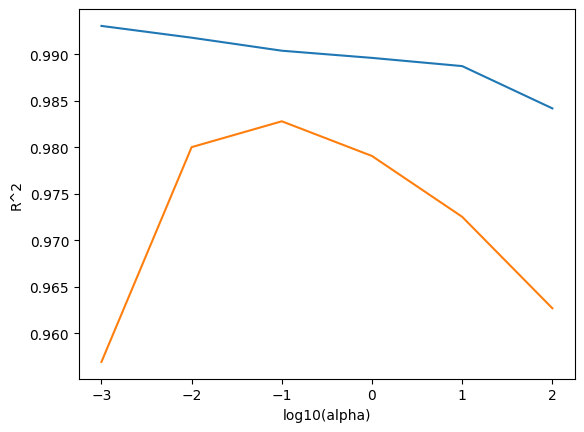

In [92]:
train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel("log10(alpha)")
plt.ylabel("R^2")
plt.show()

0.1이 가장 적합

In [93]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


## 라쏘

In [94]:
lasso = Lasso()
lasso.fit(*train_set)
print(lasso.score(*train_set))
print(lasso.score(*test_set))

0.989789897208096
0.9800593698421883


라쏘 alpha값 찾기

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


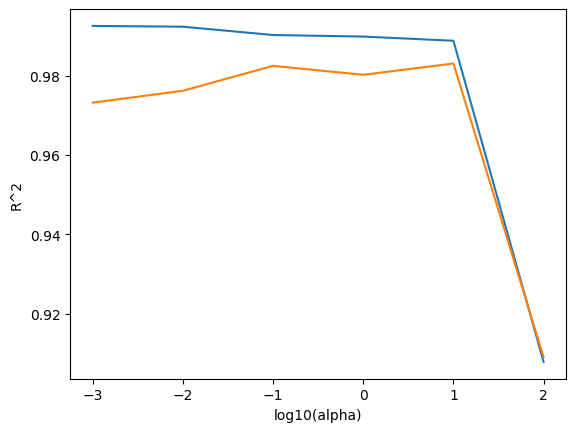

In [95]:
s1 = []
s2 = []
aL = [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2]

for a in aL:
  lasso = Lasso(alpha = a, max_iter = 10_000)
  lasso.fit(*train_set)
  s1.append(lasso.score(*train_set))
  s2.append(lasso.score(*test_set))

plt.plot(np.log10(aL), s1)
plt.plot(np.log10(aL), s2)
plt.xlabel("log10(alpha)")
plt.ylabel("R^2")
plt.show()
# 1e1이 가장 적절

In [96]:
lasso = Lasso(alpha = 10)
lasso.fit(*train_set)

print(lasso.score(*train_set))
print(lasso.score(*test_set))

0.9888067471131867
0.9824470598706695


라쏘회귀는 계수를 0으로 만들어 모델을 단순화한다.

In [97]:
print(lasso.coef_, lasso.intercept_)
print()
print(ridge.coef_, ridge.intercept_)

[ 0.          0.          0.         12.14852453 55.44856399 42.23100799
  0.          0.         13.70596191  0.         43.2185952   5.7033775
 47.46254536  7.42309425 11.85823365  0.          0.         13.53038193
 21.22111356  0.          0.          0.          0.          0.
  0.         18.66993032  0.          0.          0.         15.81041778
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         18.14672268  0.          0.          0.
  0.         15.51272953  0.          0.          0.          0.
  0.        ] 400.8333333333333

[ 27.61933479  -1.64022156 -19.73256036  30.03061951  16.99800255
  17.83247301   4.46928273   3.87258547  22.8351822   19.50417483
  17.75985317  14.53122144  13.34875736   7.57294011  19.2573194
   5.12766348  -2.05671393  10.62376405  41.72322888   5.90722851
  14.93389276  -0.4506018   19.86035413   1.27084276  -1.00708878
  19.69043816  -1.1581

In [98]:
# 한 농어에서 55개의 특성 중 40개의 특성 가중치가 0이며 15개만 유효함
print(np.sum(lasso.coef_ == 0))
print(np.sum(lasso.coef_ != 0))

40
15


#모델 완성, 예측 실습

In [112]:
new_fish = perch_full[0].reshape(-1, 3)
new_fish_target = perch_weight[0]
# new_fish = np.array([[44., 12.49, 7.6]])
# new_fish_target = perch_weight[-1]

print(new_fish, new_fish_target)

new_fish_poly = poly2.transform(new_fish)
new_fish_scaled = ss.transform(new_fish_poly)
print(new_fish_scaled.shape)
print(new_fish_scaled)

print(ridge.predict(new_fish_scaled))
print(lasso.predict(new_fish_scaled))
print(new_fish_target)

[[8.4  2.11 1.41]] 5.9
(1, 55)
[[-2.29657672 -2.0645632  -1.95288184 -1.55255604 -1.46585499 -1.45227925
  -1.38306012 -1.36853915 -1.3414385  -1.16487216 -1.12766176 -1.12993021
  -1.09096504 -1.0919529  -1.08681842 -1.05473034 -1.05422049 -1.04733556
  -1.03445922 -0.95097661 -0.93581382 -0.94095847 -0.92003743 -0.92481854
  -0.9257405  -0.90344054 -0.9076728  -0.90768173 -0.90365223 -0.88585964
  -0.88933355 -0.8882214  -0.88265495 -0.87279092 -0.82345261 -0.81922614
  -0.82441462 -0.81401521 -0.81951597 -0.82223805 -0.80760074 -0.81327179
  -0.81584326 -0.81548696 -0.79980303 -0.80545985 -0.80768359 -0.80657966
  -0.80223729 -0.79049072 -0.7959136  -0.79756241 -0.7954801  -0.78971903
  -0.78033726]]
[-14.8059787]
[-0.75085882]
5.9
